Another method:

In [22]:
import numpy as np
import cvxpy as cp

n = 7
L1 = np.array(
    [[0., 90, 0, 3, 79, 0, 0],
     [57, 0, 69, 37, 0, 94, 56],
     [79, 53, 0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0, 73, 20],
     [0, 0, 42, 0, 0, 0, 90],
     [0, 34, 0, 0, 13, 0, 0],
     [38, 0, 0, 94, 85, 22, 0]]
)
c1 = np.array([10., 146., 30., 10., 10., 10., 83.])

np.testing.assert_array_less(L1 @ np.ones(n) - L1.T @ np.ones(n), c1)

In [23]:
for T in range(1,6):
  L_boyd = [cp.Variable((n,n)) for i in range(T)]
  C_boyd = [cp.Variable((n,1)) for i in range(T)]
  P_boyd = [cp.Variable((n,n)) for i in range(T)]
  constraints_boyd_khol = [L_boyd[0] == L1]
  constraints_boyd_khol = constraints_boyd_khol+[L_boyd[i] == L_boyd[i-1] - P_boyd[i-1] for i in range(1,T)]
  constraints_boyd_khol = constraints_boyd_khol+[C_boyd[0] == c1.reshape((n,1))]
  constraints_boyd_khol = constraints_boyd_khol+[C_boyd[i] == C_boyd[i-1] - P_boyd[i-1] @ np.ones((n,1)) + (P_boyd[i-1]).T @ np.ones((n,1)) for i in range(1,T)]
  constraints_boyd_khol = constraints_boyd_khol+[L_boyd[T-1] == 0]
  constraints_boyd_khol = constraints_boyd_khol+[P_boyd[i] @ np.ones((n,1)) <= C_boyd[i] for i in range(T)]
  constraints_boyd_khol = constraints_boyd_khol+[L_boyd[i] >= 0 for i in range(1,T)]
  constraints_boyd_khol = constraints_boyd_khol+[C_boyd[i] >= 0 for i in range(1,T)]
  constraints_boyd_khol = constraints_boyd_khol+[P_boyd[i] >= 0 for i in range(T)]
  obj = cp.Minimize(0)
  problem = cp.Problem(obj, constraints_boyd_khol)
  problem.solve()
  if(np.array([L_boyd[-1].value!= None])).all():
    print('meghdar minimum T brabar %i ast'%(T))    
    break
  


meghdar minimum T brabar 5 ast


In [24]:
L_boyd[-1].value.astype('float16')

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float16)

our method (که البته غلطه)

In [ ]:
np.greater(L1,0)

array([[False,  True, False,  True,  True, False, False],
       [ True, False,  True,  True, False,  True,  True],
       [ True,  True, False, False, False, False, False],
       [False, False,  True, False, False,  True,  True],
       [False, False,  True, False, False, False,  True],
       [False,  True, False, False,  True, False, False],
       [ True, False, False,  True,  True,  True, False]])

In [ ]:
print((L1 != np.zeros((7,7))).all())

False


In [ ]:
t = 1
lt = L1
ct = c1 
l85 = []
while (lt.astype('float16') != np.zeros((n,n))).any():
  t += 1
  p = cp.Variable((n,n))
  objective = cp.Maximize(cp.min(p@np.ones((n,1))))
  constraints = [p@np.ones((n,1)) <= ct.reshape((n,1)),
                 lt - p >= 0]
  problem = cp.Problem(objective, constraints)
  result = problem.solve()
  lt = lt - p.value
  l85.append(lt@np.ones((n,1))) 
  ct = ct.reshape((n,1)) - p.value @ np.ones((n,1)) + p.value.T @ np.ones((n,1))
print(lt.astype('float16'))
print(t)
l85 = np.array(l85)




[[-0. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0. -0. -0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
161


In [ ]:
L1@np.ones((n,1))

array([[172.],
       [313.],
       [132.],
       [ 94.],
       [132.],
       [ 47.],
       [239.]])

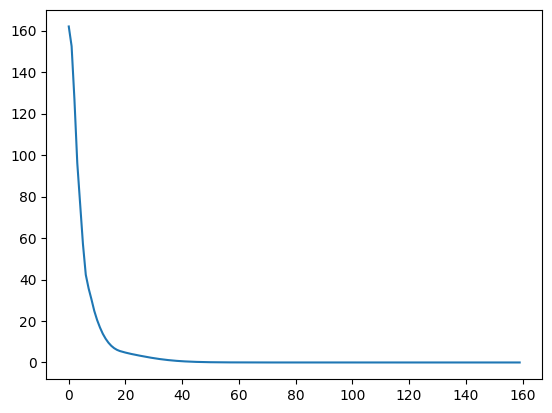

In [ ]:
A = [l85[i][0] for i in range(160)]
import matplotlib.pyplot as plt
plt.plot(A)
plt.show()


In [ ]:
A[67].astype('float16')

array([0.009346], dtype=float16)

In [ ]:
np.asmatrix(l85).T[0]

matrix([[ 1.62000000e+02,  1.52513000e+02,  1.26789883e+02,
          9.61763969e+01,  7.65729441e+01,  5.70969705e+01,
          4.22872888e+01,  3.57072033e+01,  3.04512549e+01,
          2.48400420e+01,  2.04550797e+01,  1.68767163e+01,
          1.38439295e+01,  1.14497309e+01,  9.52736697e+00,
          8.02776207e+00,  6.89923420e+00,  6.08802991e+00,
          5.52435589e+00,  5.12597946e+00,  4.76516143e+00,
          4.43277787e+00,  4.12442085e+00,  3.83514585e+00,
          3.56168662e+00,  3.29329963e+00,  3.03004666e+00,
          2.77572014e+00,  2.53000888e+00,  2.29435872e+00,
          2.07111956e+00,  1.86163222e+00,  1.66657845e+00,
          1.48561910e+00,  1.31840687e+00,  1.16473834e+00,
          1.02453546e+00,  8.97860869e-01,  7.84396404e-01,
          6.83412965e-01,  5.93900851e-01,  5.14639404e-01,
          4.44441139e-01,  3.82598310e-01,  3.28518440e-01,
          2.81536271e-01,  2.40925278e-01,  2.05957128e-01,
          1.75940227e-01,  1.50237432e-0